In [1]:
%load_ext autoreload
%autoreload 2

[0. 0. 0. 1. 0. 0. 0. 1. 3. 4.]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


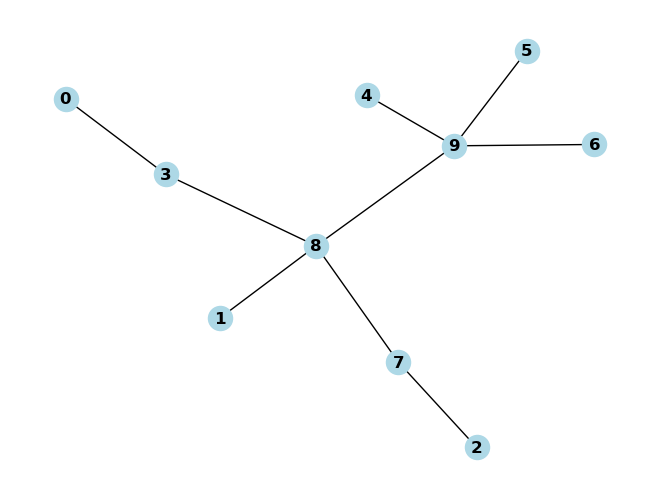

In [2]:
import sys
sys.path.append('../')

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
from tqdm import tqdm


n= 10

def generate_random_standard(n, m):
    array_2d = np.zeros((n, n))
    for i in range(m):
        array_2d[n-i-2, n-1-i:]= 1
    for i in range(n-1-m):
        random_int = random.sample(range(i+1, n), m)
        array_2d[i, random_int]= 1
    return array_2d

array_2d= generate_random_standard(n, 1)
print(np.sum(array_2d, axis= 0))
print(array_2d)
# # Create a graph from the adjacency matrix
G = nx.Graph(array_2d)

# # Draw the graph using NetworkX and Matplotlib
pos = nx.spring_layout(G)  # Positions of nodes for visualization
nx.draw(G, pos, with_labels=True, node_color='lightblue', font_weight='bold')

# # Display the plot
# plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


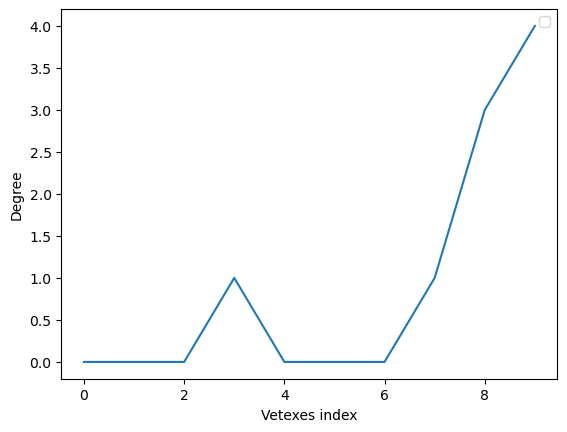

In [3]:
gradient= np.sum(array_2d, axis=0)
plt.plot(gradient)
plt.xlabel("Vetexes index")
plt.ylabel("Degree")
plt.legend()

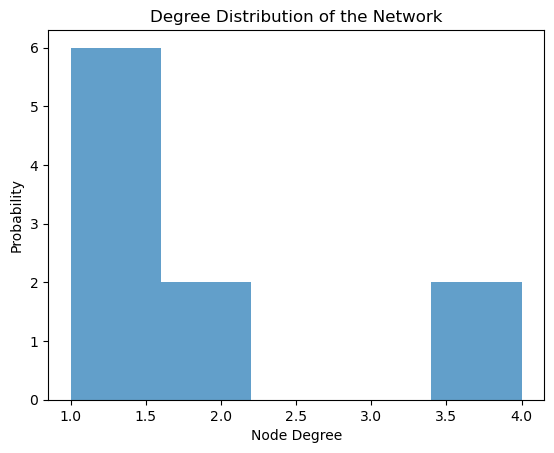

In [4]:
# Get the degree distribution
degree_sequence = [degree for _, degree in G.degree()]

# Plot the degree distribution
plt.hist(degree_sequence, bins='auto', alpha=0.7)
plt.xlabel('Node Degree')
plt.ylabel('Probability')
plt.title('Degree Distribution of the Network')
plt.show()

In [6]:
#graph=nx.dense_gnm_random_graph(n, n*6)
#graph= nx.barabasi_albert_graph(n, 4)
graph= G

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


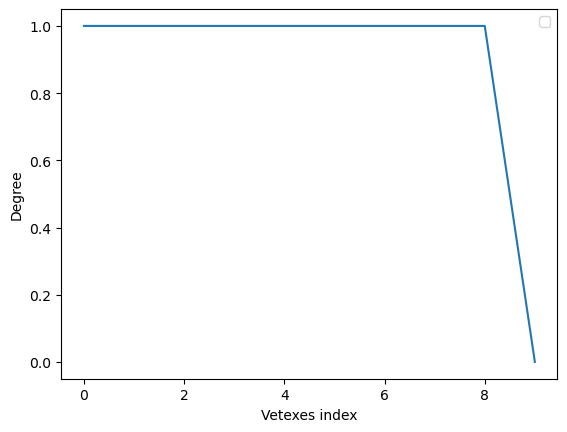

In [7]:
# Perform depth-first search traversal
# Print the traversal order
def stanard(graph, node= 0, traversal=None):
    if traversal==None:
        traversal = list(nx.dfs_preorder_nodes(graph, node))
    graphNp=nx.to_numpy_array(graph)
    lent= len(traversal)
    n= graphNp.shape[0]-1
    graphNew= np.zeros_like(graphNp)
    nameDic= {}
    for i in range(lent):
        orinInd= traversal[i]
        nameDic[orinInd]= i
        neighbors = set(graph.neighbors(orinInd))&set(traversal[0:i])
        values = [n-nameDic[key] for key in neighbors]
        graphNew[n-i, values]= 1
    return graphNew
standardNP= stanard(graph)
standardGraph= nx.Graph(standardNP)

print(standardNP)

gradient= np.sum(standardNP, axis=1)
plt.plot(gradient)
plt.xlabel("Vetexes index")
plt.ylabel("Degree")
plt.legend()

In [8]:
def greedy_min_connected(C):
    n= C.shape[0]
    sumV= np.zeros((n))
    one= np.ones((n))
    arr= np.sum(C, axis=0)
    sortedIndices = np.argsort(arr)[::-1]
    for i in range(n):
        idx= sortedIndices[i]
        sumV+= C[idx, :]
        if (sumV>= one).all():
            break
    return sortedIndices[:i+1]

def min_connected(C):# not global optimal
    keys=[]
    idS= []
    sumV=np.zeros_like(C[0, :])
    n= C.shape[0]
    for i in range(n):
        if sumV[i]>0:
            continue
        else:
            CI = []
            flag= 1
            for j in range(n):
                if C[j, i] >0:
                    CI.append(j)
            for j in CI:
                for k in range(len(keys)):
                    if (C[j, :]>= keys[k]).all():
                        sumV-= keys[k]
                        keys[k]= C[j, :]
                        sumV+= C[j, :]
                        idS[k]= j
                        flag=0
                        break
                if flag==0:
                    break
            if flag==1:
                tempV= np.zeros_like(C[0, :])
                tempV[i]= 1
                keys.append(tempV)
                sumV+= tempV
                idS.append(CI[0])
    prodc= np.prod(sumV)
    if prodc<0.1:
        print("error")
    return idS

graph=nx.barabasi_albert_graph(1000, 2)
graphNp=nx.to_numpy_array(graph)
idS=min_connected(graphNp)
sets=graphNp[idS, :]
print(sets.shape)

# xs= []
# ys= []
# for i in tqdm(range(499)):#10~1000
#     links= i+1
#     nSize= 1000
#     graph=nx.barabasi_albert_graph(nSize, links)
#     graphNp=nx.to_numpy_array(graph)
#     idS=min_connected(graphNp)
#     sets=graphNp[idS, :]
#     xs.append(links)
#     ys.append(sets.shape[0])

(221, 1000)


In [9]:
plt.plot(xs, ys, label="compress keep y")
plt.xlabel("avg links")
plt.ylabel("y")
plt.legend()

NameError: name 'xs' is not defined

In [126]:
def compress_left_order(graphNp):
    arr= np.sum(graphNp, axis=0)
    sortedIndices = np.argsort(arr)[::1]
    include= set()
    exclude= set()
    left= set(sortedIndices)
    for i in sortedIndices:
        if i in left:
            exclude.add(i)
            left.remove(i)
            tempInclude= set()
            for j in left:
                if graphNp[i, j]==1:
                    include.add(j)
                    tempInclude.add(j)
            for j in tempInclude:
                left.remove(j)
        if not left:
            break
    return include, exclude


# xs= []
# ys= []
# for i in tqdm(range(98)):#10~1000
#     graph=nx.barabasi_albert_graph(100, i+1)
#     graphNp=nx.to_numpy_array(graph)
#     idS, _=compress_left_order(graphNp)
#     sets=graphNp[list(idS), :]
#     xs.append(i+1)
#     ys.append(sets.shape[0])

  0%|          | 0/480 [00:00<?, ?it/s]

100%|██████████| 480/480 [01:08<00:00,  7.03it/s]


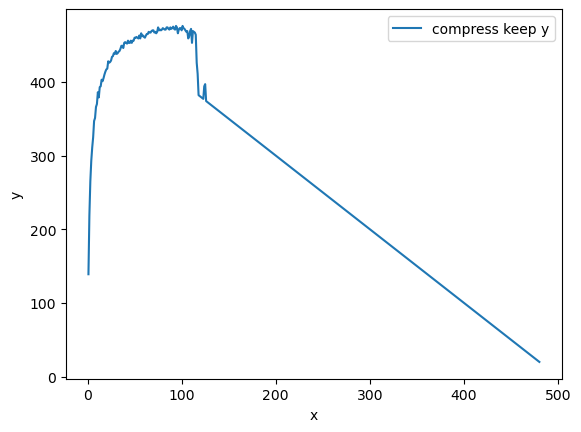

In [128]:
plt.plot(xs, ys, label="compress keep y")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

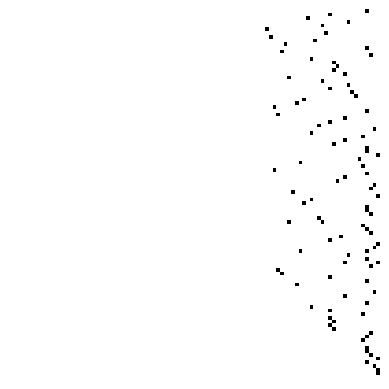

In [145]:
graph=nx.barabasi_albert_graph(100, 1)
graphNp=nx.to_numpy_array(graph)
idS, exclude=compress_left_order(graphNp)
compressed= stanard(graph, traversal=list(idS)+list(exclude))
plt.imshow(1-compressed, cmap='gray')  # Use 'gray' colormap for black and white images
plt.axis('off')  # Turn off axis labels
plt.show()

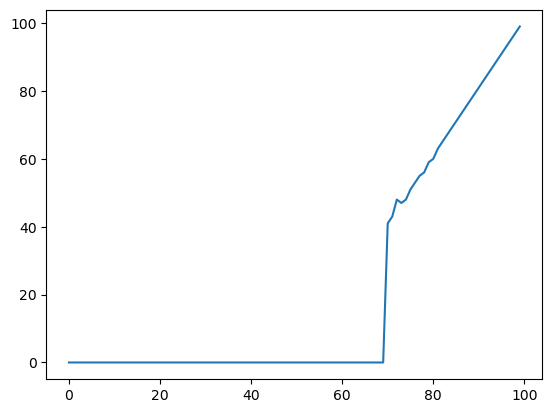

In [130]:
sumx= np.sum(compressed, axis=0)

plt.plot(sumx)